In [3]:
# uncomment the followin lines and run this cell to clone the data set repo

# !git clone https://github.com/aashishksahu/TestBench.git
# !ls TestBench/

Cloning into 'TestBench'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
datasets_732147_1270702_Customers_Parlour.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set(rc={'figure.figsize':(19,8)})

# load dataset into dataframe
data = pd.DataFrame(pd.read_csv('TestBench/datasets_732147_1270702_Customers_Parlour.csv'))

data

,date,Customers
0,2018-01-01,44
1,2018-01-02,30
2,2018-01-03,38
3,2018-01-04,33
4,2018-01-05,37
...,...,...
725,2019-12-27,29
726,2019-12-28,28
727,2019-12-29,37
728,2019-12-30,46


In [15]:
# converting date into python date time
data['date'] = pd.to_datetime(data['date'])

# creating an array of boolean values to split data for both the years 
mask_18 = data['date'] < '2019-01-01'
mask_19 = data['date'] >= '2019-01-01'

data_18 = data.loc[mask_18]
data_19 = data.loc[mask_19]

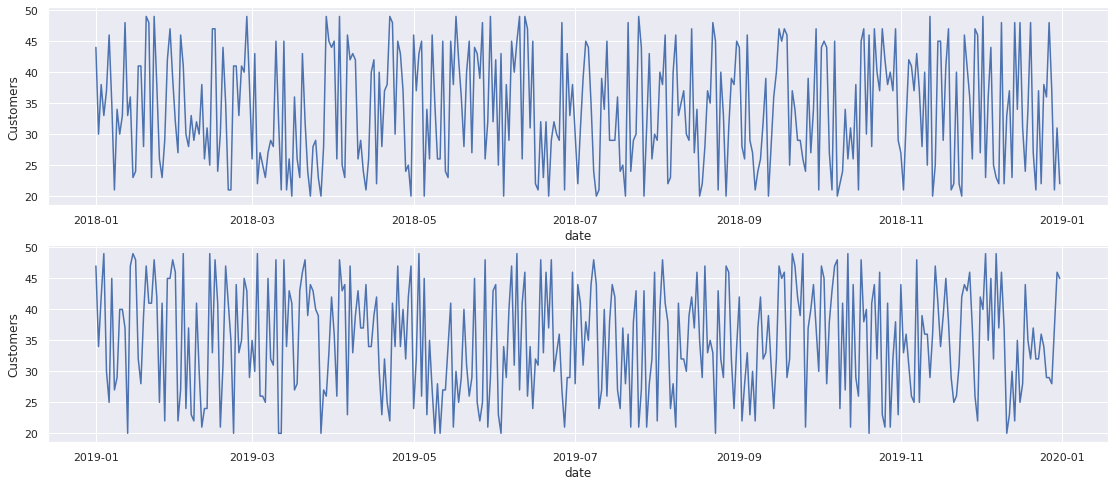

In [16]:
fig_1, axes_1 = plt.subplots(nrows=2)

# plotting data for the year 2018
sns.lineplot(x='date', y='Customers', data=data_18, ax=axes_1[0])

# plotting data for the year 2019
sns.lineplot(x='date', y='Customers', data=data_19, ax=axes_1[1])

plt.show()

In [17]:
# as we can see from the plot the data seems to have good staitionarity
# staitionarity can be confirmed if the data doesn't show any seasonality, i.e.,
# patterns of observations affected by time, therefore, we need to calculate the
# mean and variance of each month and then see the difference in them
# if the difference is not too much then data is stationary


# pandas has a groupy function which is basically a pandas way of using a SQL group by clause.
# A Grouper groups a column based on the frequency, here, the frequency is month.
# After that we just calculate the mean of all the values in the 'customers' column
# in the newly created group

month_group_mean = data.groupby(pd.Grouper(key='date', freq='M'))['Customers'].mean()
month_group_variance = data.groupby(pd.Grouper(key='date', freq='M'))['Customers'].var()

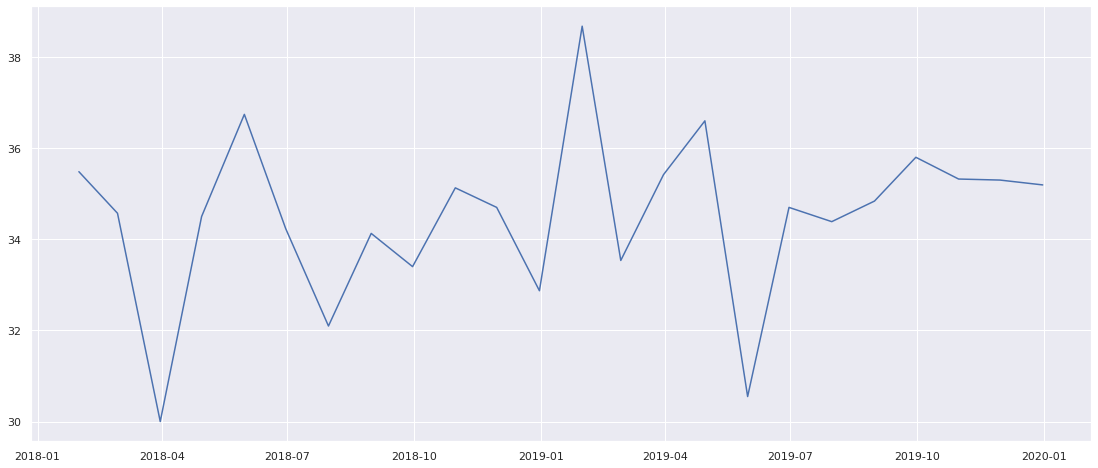

In [18]:
plt.plot(month_group_mean)

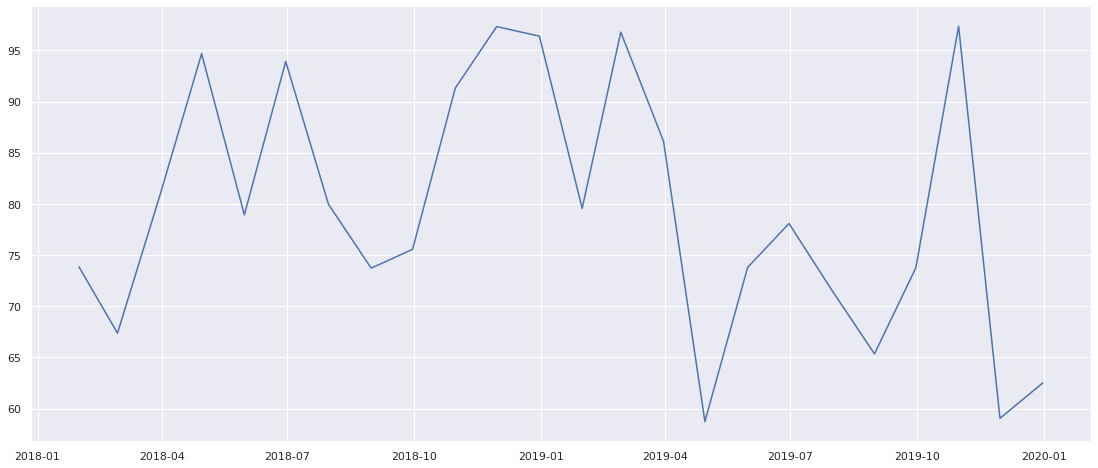

In [19]:
plt.plot(month_group_variance)

In [20]:
# So far it seems that the data is stationary, but a final test will
# reveal it's real nature
# We are now going to do an Augmented Dicky-Fuller test


from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Customers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print()
print('* with a negative statistic and less than 0.05 p-value \n* It is confirmed that the data is stationary')

ADF Statistic: -26.031963
p-value: 0.000000

* with a negative statistic and less than 0.05 p-value 
* It is confirmed that the data is stationary


In [21]:
# function to calculate moving average
def movingAverage(data, window):
    
    # array to hold moving average
    mov_avg = []
    
    for i in range(len(data)-window):
        mov_avg.append( np.sum(data_array[i:i+window, 1])/window )

    return mov_avg

In [26]:
# since the data is stationary we can simply try moving average for a few 
# window sizes

# window size (no of days)
window = [5, 15, 25]

mov_avg_per_window_size = []

data_array = np.array(data)

for w in window:
    mov_avg_per_window_size.append(movingAverage(data_array, w))

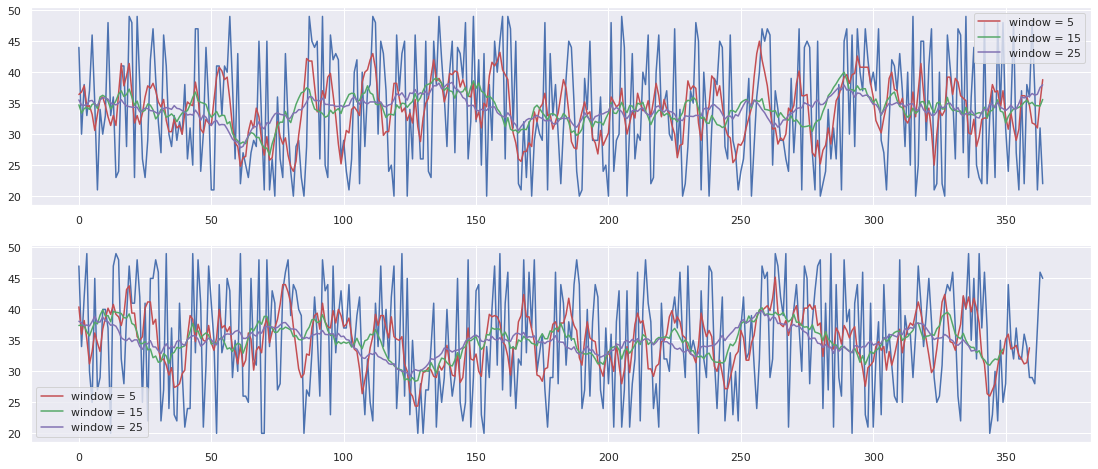

In [27]:
legend_color = ['-r', '-g', '-m']

# splitting the plot into two halves

split = int(len(data)/2)

fig, ax = plt.subplots(nrows=2)

ax[0].plot(data_array[0:split, 1])
for i in range(len(mov_avg_per_window_size)):
    lb = 'window = '+str(window[i])
    ax[0].plot(mov_avg_per_window_size[i][0:split], legend_color[i], label=lb) 

ax[0].legend(loc="best")


ax[1].plot(data_array[split:, 1])
for i in range(len(mov_avg_per_window_size)):
    lb = 'window = '+str(window[i])
    ax[1].plot(mov_avg_per_window_size[i][split:], legend_color[i], label=lb)

ax[1].legend(loc="best")

plt.show()

## Help!!

I am new to time series analysis so I am having a bit of difficulty figuring out how to model this, Therefore, any help would be appreciated. Thanks.